In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
#import mpld3

In [2]:
df = pd.read_csv('../Akkapop/output/dengue_processed_for_regression.csv')
df

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day
0,2016,Amnat Charoen,676,75.0,27.0,13.0,39.0,1638.0,130
1,2016,Ang Thong,286,75.0,27.0,13.0,39.0,1638.0,130
2,2016,Bangkok,14932,75.0,27.0,13.0,39.0,1638.0,130
3,2016,Bueng Kan,1266,75.0,27.0,13.0,39.0,1638.0,130
4,2016,Buri Ram,1500,76.6,27.4,8.5,43.2,1370.7,93
...,...,...,...,...,...,...,...,...,...
380,2020,Udon Thani,941,75.0,27.0,13.0,39.0,1638.0,130
381,2020,Uthai Thani,247,75.0,27.0,13.0,39.0,1638.0,130
382,2020,Uttaradit,587,75.0,27.0,13.0,39.0,1638.0,130
383,2020,Yala,436,75.0,27.0,13.0,39.0,1638.0,130


In [3]:
df = df.rename(columns={'province': 'Province'})
df = df.loc[df['year'] == 2019]
df

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day
231,2019,Amnat Charoen,549,75.0,27.0,13.0,39.0,1638.0,130
232,2019,Ang Thong,281,75.0,27.0,13.0,39.0,1638.0,130
233,2019,Bangkok,14020,75.0,27.0,13.0,39.0,1638.0,130
234,2019,Bueng Kan,873,75.0,27.0,13.0,39.0,1638.0,130
235,2019,Buri Ram,3860,75.7,27.6,12.1,40.2,1261.7,114
...,...,...,...,...,...,...,...,...,...
303,2019,Udon Thani,1628,69.6,27.9,8.5,42.5,1285.7,130
304,2019,Uthai Thani,689,75.0,27.0,13.0,39.0,1638.0,130
305,2019,Uttaradit,588,67.5,28.8,13.0,43.0,842.8,77
306,2019,Yala,1456,81.0,27.4,18.0,38.9,2097.2,173


In [4]:
coord = pd.read_csv('../Nuttawut/thailand_lalong.csv')
coord

,Province,latitude,longitude
0,Amnat Charoen,15.5100,104.3800
1,Ang Thong,14.3500,100.3100
2,Bangkok,13.4500,100.3500
3,Bueng Kan,18.2300,103.3700
4,Buri Ram,15.0000,103.0000
...,...,...,...
72,Udon Thani,17.2900,102.4600
73,Uthai Thani,15.3835,100.0246
74,Uttaradit,17.3600,100.5000
75,Yala,6.5411,101.2804


In [5]:
df2 = pd.merge(df,coord,on='Province')
df2

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day,latitude,longitude
0,2019,Amnat Charoen,549,75.0,27.0,13.0,39.0,1638.0,130,15.5100,104.3800
1,2019,Ang Thong,281,75.0,27.0,13.0,39.0,1638.0,130,14.3500,100.3100
2,2019,Bangkok,14020,75.0,27.0,13.0,39.0,1638.0,130,13.4500,100.3500
3,2019,Bueng Kan,873,75.0,27.0,13.0,39.0,1638.0,130,18.2300,103.3700
4,2019,Buri Ram,3860,75.7,27.6,12.1,40.2,1261.7,114,15.0000,103.0000
...,...,...,...,...,...,...,...,...,...,...,...
72,2019,Udon Thani,1628,69.6,27.9,8.5,42.5,1285.7,130,17.2900,102.4600
73,2019,Uthai Thani,689,75.0,27.0,13.0,39.0,1638.0,130,15.3835,100.0246
74,2019,Uttaradit,588,67.5,28.8,13.0,43.0,842.8,77,17.3600,100.5000
75,2019,Yala,1456,81.0,27.4,18.0,38.9,2097.2,173,6.5411,101.2804


In [6]:
# np_coord = df2[['latitude', 'longitude','quant_rain']].to_numpy()
np_coord = df2[['latitude', 'longitude','rain_ml']].to_numpy()

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [9]:
kmeans.fit(np_coord)

KMeans(init='random', n_clusters=3, random_state=42)

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0])

In [11]:
centers =  kmeans.cluster_centers_
centers

array([[  12.14270625,  101.18703437, 1721.03125   ],
       [  10.9014    ,  100.45875   , 4558.        ],
       [  15.53572326,  100.82566512,  942.71860465]])

In [12]:
cluster = pd.DataFrame({'k_n':kmeans.labels_})
cluster

,k_n
0,0
1,0
2,0
3,0
4,2
...,...
72,2
73,0
74,2
75,0


In [13]:
df3 = df2.join(cluster)
df3

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day,latitude,longitude,k_n
0,2019,Amnat Charoen,549,75.0,27.0,13.0,39.0,1638.0,130,15.5100,104.3800,0
1,2019,Ang Thong,281,75.0,27.0,13.0,39.0,1638.0,130,14.3500,100.3100,0
2,2019,Bangkok,14020,75.0,27.0,13.0,39.0,1638.0,130,13.4500,100.3500,0
3,2019,Bueng Kan,873,75.0,27.0,13.0,39.0,1638.0,130,18.2300,103.3700,0
4,2019,Buri Ram,3860,75.7,27.6,12.1,40.2,1261.7,114,15.0000,103.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
72,2019,Udon Thani,1628,69.6,27.9,8.5,42.5,1285.7,130,17.2900,102.4600,2
73,2019,Uthai Thani,689,75.0,27.0,13.0,39.0,1638.0,130,15.3835,100.0246,0
74,2019,Uttaradit,588,67.5,28.8,13.0,43.0,842.8,77,17.3600,100.5000,2
75,2019,Yala,1456,81.0,27.4,18.0,38.9,2097.2,173,6.5411,101.2804,0


In [14]:
df3['k_n'] = df3['k_n'].replace([0],100)
df3['k_n'] = df3['k_n'].replace([1],1)
df3['k_n'] = df3['k_n'].replace([2],10)
df3

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day,latitude,longitude,k_n
0,2019,Amnat Charoen,549,75.0,27.0,13.0,39.0,1638.0,130,15.5100,104.3800,100
1,2019,Ang Thong,281,75.0,27.0,13.0,39.0,1638.0,130,14.3500,100.3100,100
2,2019,Bangkok,14020,75.0,27.0,13.0,39.0,1638.0,130,13.4500,100.3500,100
3,2019,Bueng Kan,873,75.0,27.0,13.0,39.0,1638.0,130,18.2300,103.3700,100
4,2019,Buri Ram,3860,75.7,27.6,12.1,40.2,1261.7,114,15.0000,103.0000,10
...,...,...,...,...,...,...,...,...,...,...,...,...
72,2019,Udon Thani,1628,69.6,27.9,8.5,42.5,1285.7,130,17.2900,102.4600,10
73,2019,Uthai Thani,689,75.0,27.0,13.0,39.0,1638.0,130,15.3835,100.0246,100
74,2019,Uttaradit,588,67.5,28.8,13.0,43.0,842.8,77,17.3600,100.5000,10
75,2019,Yala,1456,81.0,27.4,18.0,38.9,2097.2,173,6.5411,101.2804,100


In [15]:
df3 = df3.sort_values(by=['k_n'],ascending=1)
df3

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day,latitude,longitude,k_n
50,2019,Ranong,194,78.5,27.7,20.3,37.2,3828.7,183,9.5600,98.4000,1
70,2019,Trat,635,81.0,27.9,18.2,35.8,5287.3,185,12.2428,102.5175,1
66,2019,Surat Thani,553,82.9,27.4,20.1,39.5,1233.1,143,9.6000,99.2000,10
56,2019,Samut Prakan,1325,74.3,29.1,18.4,36.5,962.6,97,13.3200,100.4000,10
28,2019,Nakhon Ratchasima,9719,69.2,28.8,13.5,41.9,639.0,130,14.5900,102.1200,10
...,...,...,...,...,...,...,...,...,...,...,...,...
39,2019,Phatthalung,898,81.7,27.8,21.5,39.0,1702.9,145,7.3900,100.0600,100
47,2019,Phuket,585,75.4,29.2,23.2,39.2,1688.8,149,7.5300,98.2400,100
48,2019,Prachin Buri,1467,69.9,29.6,17.3,40.3,1341.4,130,14.0000,101.2500,100
30,2019,Nakhon Si Thammarat,4388,81.4,27.8,20.4,38.4,2130.8,130,8.2900,100.0000,100


In [16]:
df3['k_n'] = df3['k_n'].replace([100],'High')
df3['k_n'] = df3['k_n'].replace([10],'Medium')
df3['k_n'] = df3['k_n'].replace([1],'Low')
df3

,year,Province,patient_count,humidity,temp_avg,temp_min,temp_max,rain_ml,rain_day,latitude,longitude,k_n
50,2019,Ranong,194,78.5,27.7,20.3,37.2,3828.7,183,9.5600,98.4000,Low
70,2019,Trat,635,81.0,27.9,18.2,35.8,5287.3,185,12.2428,102.5175,Low
66,2019,Surat Thani,553,82.9,27.4,20.1,39.5,1233.1,143,9.6000,99.2000,Medium
56,2019,Samut Prakan,1325,74.3,29.1,18.4,36.5,962.6,97,13.3200,100.4000,Medium
28,2019,Nakhon Ratchasima,9719,69.2,28.8,13.5,41.9,639.0,130,14.5900,102.1200,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
39,2019,Phatthalung,898,81.7,27.8,21.5,39.0,1702.9,145,7.3900,100.0600,High
47,2019,Phuket,585,75.4,29.2,23.2,39.2,1688.8,149,7.5300,98.2400,High
48,2019,Prachin Buri,1467,69.9,29.6,17.3,40.3,1341.4,130,14.0000,101.2500,High
30,2019,Nakhon Si Thammarat,4388,81.4,27.8,20.4,38.4,2130.8,130,8.2900,100.0000,High


In [17]:
df3 = df3.rename(columns={'k_n': 'rain_amount'})

In [18]:
#df3 = df3.loc[df3['year'] == 2019]
#df3

In [19]:
# plt = sns.scatterplot(data=df3, x="latitude", y="longitude", hue="k_n" )
# plt.axis('equal')

In [20]:
#print(min(df3['latitude']),max(df3['latitude']),min(df3['longitude']),max(df3['longitude']))

In [21]:
# import map
ruh_m = plt.imread('../Akkapop/img/map.jpg')

In [22]:
# Set edge
maps = pd.DataFrame(data={"lat":[97.313,105.785], "lon":[20.556,5.468]})
maps

,lat,lon
0,97.313,20.556
1,105.785,5.468


In [23]:
# Set map edge
BBox = ( maps['lat'].min(), 
         maps['lat'].max(),
         maps['lon'].min(), 
         maps['lon'].max())
BBox

(97.313, 105.785, 5.468, 20.556)

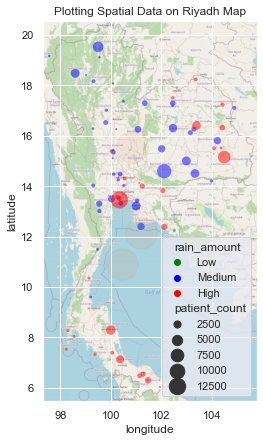

In [24]:
fig, ax = plt.subplots(figsize = (8,7))
hmax = sns.scatterplot(
    data=df3, x="longitude", y="latitude",
    hue="rain_amount" , palette=['green','blue','red'], 
    size="patient_count" , sizes=(1,300) , alpha = 0.5 )
# ax.scatter(df3.longitude, df3.latitude, alpha=0.3, c=df3.k_n, s=df3.dead_perc*1000)
hmax.scatter(centers[:, 1], centers[:, 0], s=1000, alpha=0.1)
hmax.set_title('Plotting Spatial Data on Riyadh Map')
hmax.set_xlim(BBox[0],BBox[1])
hmax.set_ylim(BBox[2],BBox[3])
hmax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
